In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

### Reading studying the data 

In [3]:
df = pd.read_csv("Toppr_DS_Assignment_Data.csv")

In [4]:
df.head()

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on
0,58891832,1,25888582,2021-08-24T08:50:59.986,2021-08-24T09:00:38.411
1,58895182,1,42704098,2021-08-24T11:20:35.380,2021-08-24T11:35:00.323
2,58894350,3,19300924,2021-08-24T10:46:49.303,2021-08-24T10:52:34.587
3,58912438,2,25481986,2021-08-25T07:59:47.025,2021-08-25T08:08:21.243
4,58913020,1,34486126,2021-08-25T08:31:19.618,2021-08-25T08:33:49.924


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449013 entries, 0 to 449012
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   session_id       449013 non-null  int64 
 1   subject_id       449013 non-null  int64 
 2   tutor_id         449013 non-null  int64 
 3   tutor_joined_on  449013 non-null  object
 4   exited_on        448189 non-null  object
dtypes: int64(3), object(2)
memory usage: 17.1+ MB


In [6]:
df.isnull().sum()

session_id           0
subject_id           0
tutor_id             0
tutor_joined_on      0
exited_on          824
dtype: int64

In [9]:
dfn = df[df.exited_on.isnull()]
dfn

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on
1596,58908492,3,38711562,2021-08-25T05:16:43.052,NaN
1632,58896538,3,9540792,2021-08-24T12:28:58.372,NaN
1747,58697446,2,43044224,2021-08-15T05:25:18.270,NaN
1969,57891650,1,27139594,2021-07-16T15:45:36.591,NaN
3265,57526640,1,4062730,2021-07-04T02:46:58.222,NaN
...,...,...,...,...,...
448008,58757104,3,33697186,2021-08-17T15:30:59.634,NaN
448346,58102510,1,4687658,2021-07-24T14:01:04.322,NaN
448391,58798414,1,43178418,2021-08-19T16:50:53.635,NaN
448697,58816480,3,41825146,2021-08-20T16:08:27.904,NaN


In [10]:
df.describe()

,session_id,subject_id,tutor_id
count,4.490130e+05,449013.000000,4.490130e+05
mean,5.829501e+07,2.326783,2.790091e+07
std,4.630696e+05,0.993714,1.122524e+07
min,5.745777e+07,1.000000,2.898800e+04
25%,5.789594e+07,1.000000,1.930092e+07
50%,5.831220e+07,3.000000,2.699527e+07
75%,5.869969e+07,3.000000,3.925151e+07
max,5.905844e+07,4.000000,4.588914e+07


In [11]:
df.subject_id.unique()

array([1, 3, 2, 4], dtype=int64)

In [16]:
df.tutor_id.nunique()

807

In [13]:
df.session_id.nunique()

445348

In [19]:
df_trunc = df["session_id"]

In [20]:
df_trunc[df_trunc.duplicated()]

12231     58958694
14365     57485574
14450     58784130
15468     58887412
17779     57805974
            ...   
448588    58409200
448697    58816480
448730    59032132
448763    58820882
448940    58645698
Name: session_id, Length: 3665, dtype: int64

In [21]:
df[df["session_id"]==58958694]

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on
8691,58958694,4,41640784,2021-08-27T12:39:44.664,NaN
12231,58958694,4,43514944,2021-08-27T12:40:25.609,2021-08-27T12:41:59.647
119146,58958694,4,41640784,2021-08-27T12:39:47.683,NaN
140497,58958694,4,27758016,2021-08-27T12:39:44.049,NaN
249731,58958694,4,29601284,2021-08-27T12:39:46.041,NaN
366524,58958694,4,33841132,2021-08-27T12:39:43.525,NaN
396407,58958694,4,9139136,2021-08-27T12:39:46.245,NaN
407560,58958694,4,4146346,2021-08-27T12:39:45.514,NaN


In [22]:
df[df["session_id"]==57485574]

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on
2005,57485574,2,17331878,2021-07-02T05:33:42.605,2021-07-02T05:53:15.654
14365,57485574,2,20596344,2021-07-02T05:53:32.541,2021-07-02T05:54:48.253


In [23]:
df[df["session_id"]==58887412]

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on
15467,58887412,3,17860326,2021-08-24T05:34:15.497,NaN
15468,58887412,3,36592702,2021-08-24T05:34:24.987,NaN
69702,58887412,3,17860326,2021-08-24T05:34:19.554,NaN
162147,58887412,3,36592702,2021-08-24T05:34:28.049,2021-08-24T05:56:00.310
171908,58887412,3,17860326,2021-08-24T05:34:22.488,NaN
299347,58887412,3,17860326,2021-08-24T05:34:17.071,NaN
315089,58887412,3,36592702,2021-08-24T05:34:26.408,NaN
324767,58887412,3,23468322,2021-08-24T05:34:21.261,NaN
360099,58887412,3,17860326,2021-08-24T05:34:26.845,NaN
425474,58887412,3,8915448,2021-08-24T05:34:27.299,NaN


**A possible logical explanition behind the missing values seems to be the sessions that were initiated but were not connected due to some techical glitch, hence would be dropping these.**

In [24]:
df1 = df.dropna(axis='rows')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448189 entries, 0 to 449012
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   session_id       448189 non-null  int64 
 1   subject_id       448189 non-null  int64 
 2   tutor_id         448189 non-null  int64 
 3   tutor_joined_on  448189 non-null  object
 4   exited_on        448189 non-null  object
dtypes: int64(3), object(2)
memory usage: 20.5+ MB


In [30]:
df1.tutor_joined_on	 = pd.to_datetime(df1.tutor_joined_on)

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
df1.exited_on	 = pd.to_datetime(df1.exited_on)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448189 entries, 0 to 449012
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   session_id       448189 non-null  int64         
 1   subject_id       448189 non-null  int64         
 2   tutor_id         448189 non-null  int64         
 3   tutor_joined_on  448189 non-null  datetime64[ns]
 4   exited_on        448189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 20.5 MB


In [32]:
df_trunc = df1["session_id"]

In [33]:
df1[df_trunc.duplicated()]

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on
14365,57485574,2,20596344,2021-07-02 05:53:32.541,2021-07-02 05:54:48.253
17779,57805974,2,20596344,2021-07-13 12:35:26.506,2021-07-13 12:39:48.498
18765,57621256,2,10992006,2021-07-07 10:03:32.745,2021-07-07 10:23:25.013
19273,58941868,1,11039266,2021-08-26 16:58:43.915,2021-08-26 17:02:23.206
19842,57950212,3,36309964,2021-07-18 11:18:01.561,2021-07-18 11:28:48.833
...,...,...,...,...,...
448473,58603760,3,38720316,2021-08-11 04:02:22.012,2021-08-11 04:06:05.546
448504,58318592,2,43811614,2021-07-31 13:01:54.474,2021-07-31 13:07:46.038
448588,58409200,3,43245556,2021-08-03 18:59:53.951,2021-08-03 19:07:08.337
448763,58820882,1,35090740,2021-08-21 03:06:08.085,2021-08-21 03:17:54.796


In [41]:
df1['ht'] = (df1.exited_on-df1.tutor_joined_on).astype('timedelta64[s]')/60.0  #calculationg time delta in minutes

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df1['month'] = pd.DatetimeIndex(df1['tutor_joined_on']).month

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df1.head()

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on,ht,month
0,58891832,1,25888582,2021-08-24 08:50:59.986,2021-08-24 09:00:38.411,9.633333,8
1,58895182,1,42704098,2021-08-24 11:20:35.380,2021-08-24 11:35:00.323,14.400000,8
2,58894350,3,19300924,2021-08-24 10:46:49.303,2021-08-24 10:52:34.587,5.750000,8
3,58912438,2,25481986,2021-08-25 07:59:47.025,2021-08-25 08:08:21.243,8.566667,8
4,58913020,1,34486126,2021-08-25 08:31:19.618,2021-08-25 08:33:49.924,2.500000,8


## Average Handeling time by month for all subjects

In [55]:
aht_month = df1.groupby(['month','subject_id']).agg('mean').ht
aht_month

month  subject_id
6      1              8.599462
       2              8.234028
       3             11.886806
       4              6.121569
7      1             10.578475
       2              9.299896
       3             10.394616
       4              7.230122
8      1             10.892168
       2              9.966970
       3             10.626141
       4              7.680623
Name: ht, dtype: float64

<AxesSubplot:xlabel='month'>

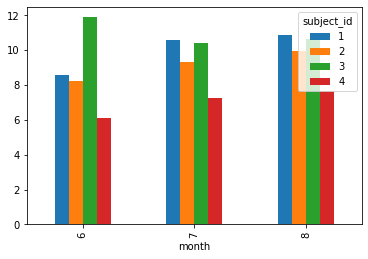

In [65]:
aht_month.unstack().reset_index().plot.bar(x='month')

## Number of douts per session

In [80]:
df1[df_trunc.duplicated()].head()

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on,ht,month
14365,57485574,2,20596344,2021-07-02 05:53:32.541,2021-07-02 05:54:48.253,1.250000,7
17779,57805974,2,20596344,2021-07-13 12:35:26.506,2021-07-13 12:39:48.498,4.350000,7
18765,57621256,2,10992006,2021-07-07 10:03:32.745,2021-07-07 10:23:25.013,19.866667,7
19273,58941868,1,11039266,2021-08-26 16:58:43.915,2021-08-26 17:02:23.206,3.650000,8
19842,57950212,3,36309964,2021-07-18 11:18:01.561,2021-07-18 11:28:48.833,10.783333,7


In [75]:
df1[df1.session_id == 57485574]

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on,ht,month
2005,57485574,2,17331878,2021-07-02 05:33:42.605,2021-07-02 05:53:15.654,19.55,7
14365,57485574,2,20596344,2021-07-02 05:53:32.541,2021-07-02 05:54:48.253,1.25,7


In [76]:
df_sess_tut = df1[['session_id', 'tutor_id']]

In [79]:
df_sess_tut.head()

,session_id,tutor_id
0,58891832,25888582
1,58895182,42704098
2,58894350,19300924
3,58912438,25481986
4,58913020,34486126


In [78]:
df1[df_sess_tut.duplicated()]

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on,ht,month


### The above dataframe is empty imples when we have a common session id where multiple doubts are resolved, the tutor is different. So the tutor is only solving one doubt per session id

### Checking if one tutor is present in multiple session at the same time:

In [94]:
df1['uid'] = df1.session_id.apply(str) + '_' + df1.tutor_id.apply(str)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
df1['parallel_ses'] = 0

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
df1.head()

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on,ht,month,uid,parallel_ses
0,58891832,1,25888582,2021-08-24 08:50:59.986,2021-08-24 09:00:38.411,9.633333,8,58891832_25888582,0
1,58895182,1,42704098,2021-08-24 11:20:35.380,2021-08-24 11:35:00.323,14.400000,8,58895182_42704098,0
2,58894350,3,19300924,2021-08-24 10:46:49.303,2021-08-24 10:52:34.587,5.750000,8,58894350_19300924,0
3,58912438,2,25481986,2021-08-25 07:59:47.025,2021-08-25 08:08:21.243,8.566667,8,58912438_25481986,0
4,58913020,1,34486126,2021-08-25 08:31:19.618,2021-08-25 08:33:49.924,2.500000,8,58913020_34486126,0


In [111]:
tutor_grp = df1.groupby('tutor_id')

In [124]:
# my = 0
from tqdm import tqdm

In [174]:
df2 = df1.copy()
# df2['parallel_ses'] = np.nan

In [188]:
%%time
# my = 0
df_par = pd.DataFrame()
for tutor, tutor_df in tqdm(tutor_grp):
#     if my >3:
#         break
    dftemp = tutor_df.sort_values('tutor_joined_on').reset_index(drop=True)
    for j in range(len(dftemp)):
        en_cur = dftemp.iloc[j].exited_on
        st_cur = dftemp.iloc[j].tutor_joined_on
        cou = 0
        for k in range(max(0,j-10),min(j+10,len(dftemp))):
            if dftemp.iloc[k].tutor_joined_on > en_cur:
                break
            if dftemp.iloc[k].tutor_joined_on < en_cur and dftemp.iloc[k].exited_on > st_cur:
                cou += 1
        dftemp.at[j,'parallel_ses'] = cou
#     my+=1
    dftemp1 = dftemp[['uid', 'parallel_ses']]
    df_par = pd.concat([df_par,dftemp1], ignore_index = True)
#     df2 = df2.merge(dftemp1, on = ['uid', 'parallel_ses'], how = 'outer')
#     print(dftemp)
    

100%|██████████████████████████████████████████████████████████████████████████████| 807/807 [1:34:34<00:00,  7.03s/it]

Wall time: 1h 34min 34s


In [189]:
df_par

,uid,parallel_ses
0,57567324_28988,1
1,58646444_503616,1
2,58662510_503616,1
3,58810874_503616,1
4,58868954_503616,1
...,...,...
448184,58941582_45836146,4
448185,58941956_45836146,3
448186,58942028_45836146,2
448187,58812814_45848576,1


In [190]:
ddd = pd.merge(df2,df_par, on = 'uid', how = 'inner')

In [192]:
ddd.head()

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on,ht,month,uid,parallel_ses_x,parallel_ses_y
0,58891832,1,25888582,2021-08-24 08:50:59.986,2021-08-24 09:00:38.411,9.633333,8,58891832_25888582,0,7
1,58895182,1,42704098,2021-08-24 11:20:35.380,2021-08-24 11:35:00.323,14.400000,8,58895182_42704098,0,5
2,58894350,3,19300924,2021-08-24 10:46:49.303,2021-08-24 10:52:34.587,5.750000,8,58894350_19300924,0,5
3,58912438,2,25481986,2021-08-25 07:59:47.025,2021-08-25 08:08:21.243,8.566667,8,58912438_25481986,0,4
4,58913020,1,34486126,2021-08-25 08:31:19.618,2021-08-25 08:33:49.924,2.500000,8,58913020_34486126,0,4


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


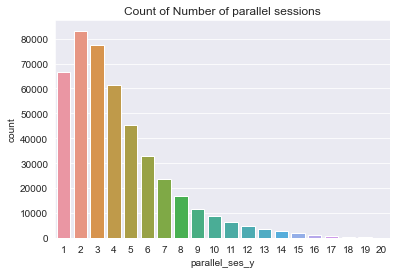

In [196]:
sns.countplot(ddd.parallel_ses_y)
plt.title('Count of Number of parallel sessions')
plt.show()

## From the plot it is established that there are some sessions where a tutor is working parallely on more than 20 problems simultaniously. Here is a snippet to verify if the finding is correct:

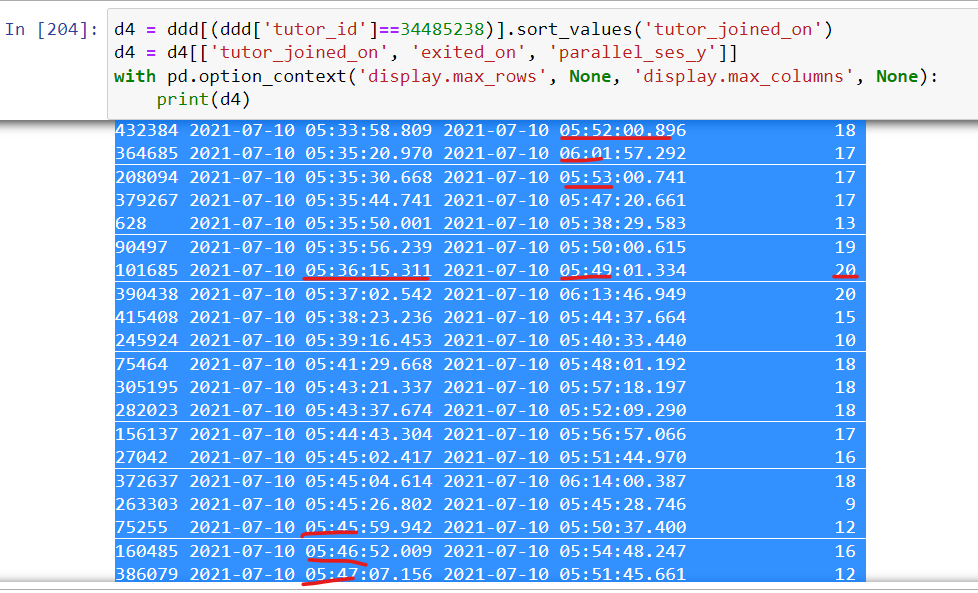

Text(0.5, 1.0, 'Average time vs Number of Sessions')

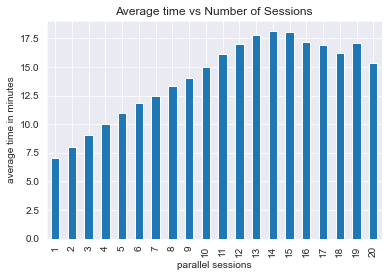

In [197]:
ddd.groupby('parallel_ses_y').ht.agg('mean').plot.bar()
plt.xlabel("parallel sessions")
plt.ylabel("average time in minutes")
plt.title("Average time vs Number of Sessions")

## We see that as the number of sessions increase, the average handling time also increases. We can consider a threshold of 10 mins for a session and that would imply that we allow a max of 4 sessions at a time so that the duration is not much.

In [203]:
d4 = ddd[(ddd['parallel_ses_y']>19)].sort_values('tutor_joined_on')
# d4 = d4[['tutor_joined_on', 'exited_on', 'parallel_ses_y']]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(d4)
d4

,session_id,subject_id,tutor_id,tutor_joined_on,exited_on,ht,month,uid,parallel_ses_x,parallel_ses_y
101685,57689032,3,34485238,2021-07-10 05:36:15.311,2021-07-10 05:49:01.334,12.766667,7,57689032_34485238,0,20
390438,57689090,3,34485238,2021-07-10 05:37:02.542,2021-07-10 06:13:46.949,36.733333,7,57689090_34485238,0,20
94190,57690196,3,34485238,2021-07-10 05:58:53.942,2021-07-10 06:17:55.432,19.016667,7,57690196_34485238,0,20
342704,57690408,3,34485238,2021-07-10 06:02:43.361,2021-07-10 06:26:39.371,23.933333,7,57690408_34485238,0,20
132177,57820454,2,36590498,2021-07-14 05:06:00.226,2021-07-14 05:25:00.300,19.000000,7,57820454_36590498,0,20
...,...,...,...,...,...,...,...,...,...,...
23819,58887978,3,17860326,2021-08-24 05:54:07.800,2021-08-24 06:12:00.350,17.866667,8,58887978_17860326,0,20
92336,58927856,3,26274430,2021-08-26 05:37:35.590,2021-08-26 05:53:00.504,15.400000,8,58927856_26274430,0,20
335446,58927412,3,26274430,2021-08-26 05:38:53.024,2021-08-26 05:50:37.487,11.733333,8,58927412_26274430,0,20
51534,58996470,2,18325306,2021-08-29 05:42:32.099,2021-08-29 06:13:35.051,31.033333,8,58996470_18325306,0,20


In [205]:
# d4 = ddd[(ddd['tutor_id']==34485238)].sort_values('tutor_joined_on')
# d4 = d4[['tutor_joined_on', 'exited_on', 'parallel_ses_y']]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(d4)